<a href="https://colab.research.google.com/github/trinhminhtris/ANN/blob/main/Fashion_MNIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils import to_categorical
from keras.utils import load_img

4422102/4422102 [==============================] - 0s 0us/step


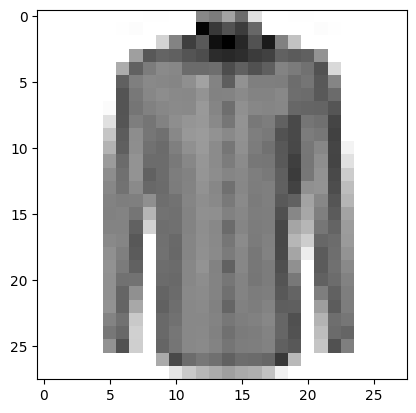

Số:  6


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
digit = x_train[3000]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print('Số: ', y_train[3000])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

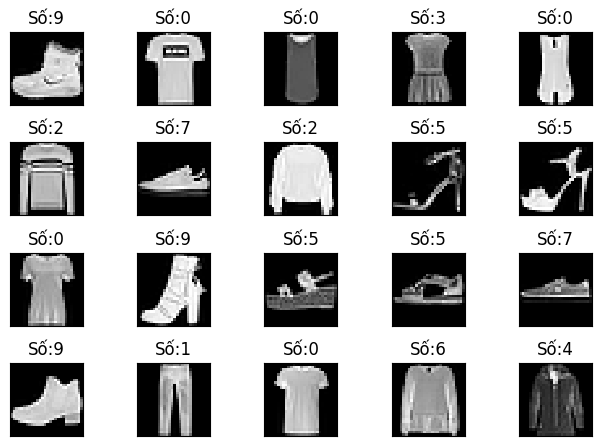

In [ ]:
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
model = Sequential()
# Tạo các lớp ẩn
model.add(Dense(10000, activation = 'relu', input_shape = (28*28, )))
model.add(Dense(5000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
# Output
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10000)             7850000   
                                                                 
 dense_7 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_8 (Dense)             (None, 1000)              5001000   
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 100)               50100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 63,407,610
Trainable params: 63,407,610


In [ ]:
X = x_test
Y = y_test

In [ ]:
x_train = x_train.reshape(60000, 28*28)

# chuyển ảnh có dữ liệu của mỗi pixel 0 ->255 thành ảnh xám 0 -> 1
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 28*28)
x_test = x_test.astype('float32')/255

x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mất mát: ', test_loss)
print('Độ chính xác: ', test_acc)

Epoch 1/10
469/469 [==============================] - 590s 1s/step - loss: 0.7843 - accuracy: 0.7186
Epoch 2/10
469/469 [==============================] - 634s 1s/step - loss: 0.4375 - accuracy: 0.8402
Epoch 3/10
469/469 [==============================] - 665s 1s/step - loss: 0.3741 - accuracy: 0.8639
Epoch 4/10
469/469 [==============================] - 669s 1s/step - loss: 0.3429 - accuracy: 0.8745
Epoch 5/10
469/469 [==============================] - 669s 1s/step - loss: 0.3204 - accuracy: 0.8823
Epoch 6/10
469/469 [==============================] - 672s 1s/step - loss: 0.2988 - accuracy: 0.8895
Epoch 7/10
469/469 [==============================] - 670s 1s/step - loss: 0.2870 - accuracy: 0.8939
Epoch 8/10
469/469 [==============================] - 674s 1s/step - loss: 0.2742 - accuracy: 0.8996
Epoch 9/10
469/469 [==============================] - 673s 1s/step - loss: 0.2631 - accuracy: 0.9025
Epoch 10/10
313/313 [==============================] - 24s 77ms/step - loss: 0.3791 - accur

In [ ]:
model.save('fashion_mnist.h5')